--- [PART 1] Loading Libraries and Defining Constants ---
--- Constants Defined ---
Sequence Length: 8
Image Size: (150, 150)
Batch Size: 8
--------------------------------------------------

--- [PART 2] Preparing Data (Loading and Indexing) ---

DataFrames created:
  train_df shape: (17600, 5)
  validation_df shape: (4224, 5)
  test_df shape: (1408, 5)

Finding valid indices for DataFrame with 17600 rows...
Found 17425 valid sequence starting points.
Finding valid indices for DataFrame with 4224 rows...
Found 4182 valid sequence starting points.
Finding valid indices for DataFrame with 1408 rows...
Found 1394 valid sequence starting points.

Summary of valid indices:
  Training sequences:   17425
  Validation sequences: 4182
  Test sequences:       1394

NOTE: If Test sequences is 0, you MUST edit 'Sheet1.csv' to create a 'test' split.

--- Data Preparation Complete ---
--------------------------------------------------

--- [PART 3] Defining Data Generator Class ---
ImageSequenceGen

Model: "ResNet101_Feature_Extractor"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 156, 156,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 75, 75,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 75, 75,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 75, 75,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 77, 77,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 38, 38,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 38, 38,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 38, 38,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 38, 38,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 38, 38,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 38, 38,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 38, 38,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 38, 38,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 38, 38,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 38, 38,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 38, 38,    │      1,024 │ conv2_block1_3_c

 Total params: 43,272,876 (165.07 MB)

 Trainable params: 15,590,700 (59.47 MB)

 Non-trainable params: 27,682,176 (105.60 MB)


--- Full CNN-LSTM Model Built and Compiled ---


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequence_input (InputLayer)     │ (None, 8, 150, 150, 3) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 8, 300)         │    43,272,876 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 8, 256)         │       570,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 8, 256)         │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 256)            │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier_fc1 (Dense)          │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier_output (Dense)       │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,927,022 (171.38 MB)

 Trainable params: 17,244,846 (65.78 MB)

 Non-trainable params: 27,682,176 (105.60 MB)

--------------------------------------------------

--- [PART 5] Starting Training and Evaluation ---
Callbacks defined: EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

--- Starting Model Training ---


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
2178/2178 ━━━━━━━━━━━━━━━━━━━━ 7657s 3s/step - accuracy: 0.8573 - loss: 0.3275 - val_accuracy: 0.7466 - val_loss: 0.9168 - learning_rate: 1.0000e-04
Epoch 2/20
2178/2178 ━━━━━━━━━━━━━━━━━━━━ 7249s 3s/step - accuracy: 0.9148 - loss: 0.2064 - val_accuracy: 0.5043 - val_loss: 2.5028 - learning_rate: 1.0000e-04
Epoch 3/20
2178/2178 ━━━━━━━━━━━━━━━━━━━━ 7282s 3s/step - accuracy: 0.9369 - loss: 0.1592 - val_accuracy: 0.8702 - val_loss: 0.6668 - learning_rate: 1.0000e-04
Epoch 4/20
2178/2178 ━━━━━━━━━━━━━━━━━━━━ 7131s 3s/step - accuracy: 0.9473 - loss: 0.1393 - val_accuracy: 0.8012 - val_loss: 0.9624 - learning_rate: 1.0000e-04
Epoch 5/20
2178/2178 ━━━━━━━━━━━━━━━━━━━━ 7132s 3s/step - accuracy: 0.9563 - loss: 0.1161 - val_accuracy: 0.8628 - val_loss: 0.4580 - learning_rate: 1.0000e-04
Epoch 6/20
2178/2178 ━━━━━━━━━━━━━━━━━━━━ 7459s 3s/step - accuracy: 0.9552 - loss: 0.1178 - val_accuracy: 0.8470 - val_loss: 0.5984 - learning_rate: 1.0000e-04
Epoch 7/20
2178/2178 ━━━━━━━━━━━━━━━━━━━

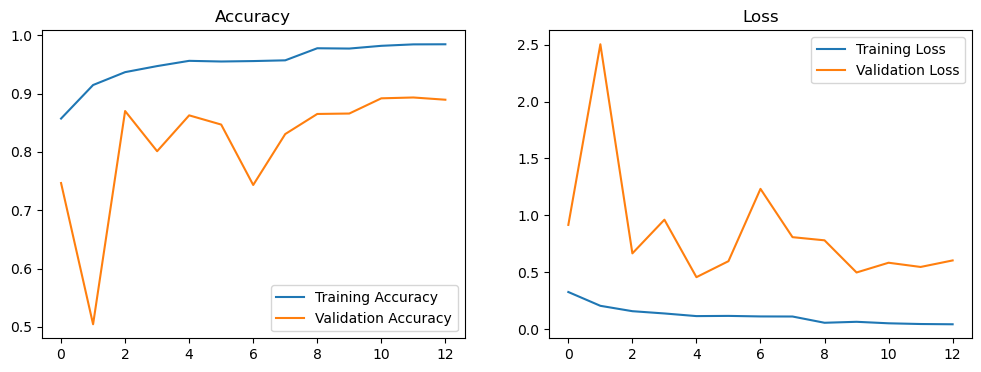

In [ ]:
"""
This script combines all 5 parts of the action recognition pipeline
into a single file, representing a sequential Jupyter Notebook.

This version is corrected for underfitting by:
1. Implementing fine-tuning (unfreezing ResNet's 'conv5' layers).
2. Setting the precise learning rate (0.0001) from the paper.
3. Adding Dropout layers for robustness.
4. Ensuring final evaluation is on the 'test_gen'.
"""

# ----------------------------------------------------------------------
# PART 1: IMPORTS AND SETUP
# ----------------------------------------------------------------------
print("--- [PART 1] Loading Libraries and Defining Constants ---")

import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
import os
import matplotlib.pyplot as plt

# Imports for model architecture
from tensorflow.keras.layers import (
    Input, LSTM, Dense, TimeDistributed, 
    GlobalAveragePooling2D, Dropout
)
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# --- CRITICAL: Import the Adam optimizer to set the learning rate ---
from tensorflow.keras.optimizers import Adam

# Imports for evaluation
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from tensorflow.keras.utils import to_categorical

# --- 1. DEFINE CONSTANTS (from paper) ---
SEQUENCE_LENGTH = 8
IMAGE_SIZE = (150, 150)  # (width, height) as per cv2.resize
BATCH_SIZE = 8

NUM_CLASSES = 2
CLASS_NAMES = ['safe', 'risk']
LABEL_MAP = {'safe': 0, 'risk': 1}
CSV_FILE_PATH = 'Sheet1.csv' # Make sure this file is in the same directory

print("--- Constants Defined ---")
print(f"Sequence Length: {SEQUENCE_LENGTH}")
print(f"Image Size: {IMAGE_SIZE}")
print(f"Batch Size: {BATCH_SIZE}")
print("-" * 50 + "\n")


# ----------------------------------------------------------------------
# PART 2: DATA PREPARATION
# ----------------------------------------------------------------------
print("--- [PART 2] Preparing Data (Loading and Indexing) ---")

def find_valid_indices(df, seq_length):
    """
    Finds all valid start indices for sequences within a DataFrame.
    A start index 'i' is valid if the sequence [i, i + seq_length - 1]
    all belongs to the same 'Case'.
    """
    print(f"Finding valid indices for DataFrame with {len(df)} rows...")
    valid_indices = []
    # Group by 'Case' to find contiguous blocks
    case_indices = df.groupby('Case').indices
    
    for case, indices in case_indices.items():
        if len(indices) >= seq_length:
            # Iterate through all possible start positions for this case
            for i in range(len(indices) - seq_length + 1):
                start_row_index = indices[i]
                last_row_index = indices[i + seq_length - 1]
                
                # Check if the indices in the DataFrame are contiguous
                if (last_row_index - start_row_index) == (seq_length - 1):
                    valid_indices.append(start_row_index)

    print(f"Found {len(valid_indices)} valid sequence starting points.")
    return valid_indices

# Load the main DataFrame
try:
    df = pd.read_csv(CSV_FILE_PATH)
    
    # Map string labels to integers
    df['Label'] = df['Label'].map(LABEL_MAP)

    # Split the DataFrame based on the 'Split' column
    train_df = df[df['Split'] == 'train'].reset_index(drop=True)
    validation_df = df[df['Split'] == 'validation'].reset_index(drop=True)
    test_df = df[df['Split'] == 'test'].reset_index(drop=True)

    print(f"\nDataFrames created:")
    print(f"  train_df shape: {train_df.shape}")
    print(f"  validation_df shape: {validation_df.shape}")
    print(f"  test_df shape: {test_df.shape}\n")

    # Pre-calculate the valid sequence start indices
    train_indices = find_valid_indices(train_df, SEQUENCE_LENGTH)
    val_indices = find_valid_indices(validation_df, SEQUENCE_LENGTH)
    test_indices = find_valid_indices(test_df, SEQUENCE_LENGTH)

    print("\nSummary of valid indices:")
    print(f"  Training sequences:   {len(train_indices)}")
    print(f"  Validation sequences: {len(val_indices)}")
    print(f"  Test sequences:       {len(test_indices)}")
    print("\nNOTE: If Test sequences is 0, you MUST edit 'Sheet1.csv' to create a 'test' split.")


except FileNotFoundError:
    print(f"ERROR: Cannot find file {CSV_FILE_PATH}")
    print("Please make sure the CSV file is in the same directory.")
    train_df, validation_df, test_df = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
    train_indices, val_indices, test_indices = [], [], []

print("\n--- Data Preparation Complete ---")
print("-" * 50 + "\n")


# ----------------------------------------------------------------------
# PART 3: DATA GENERATOR CLASS
# ----------------------------------------------------------------------
print("--- [PART 3] Defining Data Generator Class ---")

class ImageSequenceGenerator(tf.keras.utils.Sequence):
    """
    Generates batches of image sequences and their corresponding labels.
    """
    def __init__(self, df, valid_indices, batch_size, seq_length, image_size, num_classes, shuffle=True):
        self.df = df
        self.valid_indices = valid_indices
        self.batch_size = batch_size
        self.seq_length = seq_length
        self.image_size = image_size # (width, height)
        self.num_classes = num_classes
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        """Denotes the number of batches per epoch"""
        return int(np.floor(len(self.valid_indices) / self.batch_size))

    def __getitem__(self, index):
        """Generate one batch of data"""
        start_batch_index = index * self.batch_size
        end_batch_index = (index + 1) * self.batch_size
        batch_start_indices = self.valid_indices[start_batch_index:end_batch_index]

        current_batch_size = len(batch_start_indices)
        
        # Adjust dimensions for IMAGE_SIZE tuple (width, height)
        img_height, img_width = self.image_size[1], self.image_size[0]
        
        X = np.zeros((current_batch_size, self.seq_length, img_height, img_width, 3), dtype=np.float32)
        y = np.zeros((current_batch_size), dtype=int)

        for i, start_index in enumerate(batch_start_indices):
            sequence_df = self.df.iloc[start_index : start_index + self.seq_length]
            image_paths = sequence_df['File Path'].values
            
            # Label is the label of the *last* frame in the sequence
            y[i] = sequence_df['Label'].iloc[-1]

            for j, path in enumerate(image_paths):
                normalized_path = os.path.normpath(path)
                try:
                    img = cv2.imread(normalized_path)
                    if img is None:
                        # print(f"Warning: Could not read image {normalized_path}. Using black image.")
                        img = np.zeros((img_height, img_width, 3))
                    else:
                        img = cv2.resize(img, self.image_size) # Resize to (width, height)
                        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Ensure RGB
                        img = img / 255.0 # Normalize
                    X[i, j, :, :, :] = img
                except Exception as e:
                    print(f"Error loading image {normalized_path}: {e}")
                    X[i, j, :, :, :] = np.zeros((img_height, img_width, 3))

        return X, to_categorical(y, num_classes=self.num_classes)

    def on_epoch_end(self):
        """Shuffles indices after each epoch if shuffle is True"""
        if self.shuffle:
            np.random.shuffle(self.valid_indices)

print("ImageSequenceGenerator class defined.")
print("-" * 50 + "\n")


# ----------------------------------------------------------------------
# PART 4: MODEL ARCHITECTURE (With Fine-Tuning)
# ----------------------------------------------------------------------
print("--- [PART 4] Building Model Architecture ---")

# --- Create Generator Instances ---
print("\n--- Creating Generators ---")
if 'train_df' in locals() and not train_df.empty:
    train_gen = ImageSequenceGenerator(
        train_df, 
        train_indices, 
        BATCH_SIZE, 
        SEQUENCE_LENGTH, 
        IMAGE_SIZE, # (width, height)
        NUM_CLASSES,
        shuffle=True
    )

    val_gen = ImageSequenceGenerator(
        validation_df, 
        val_indices, 
        BATCH_SIZE, 
        SEQUENCE_LENGTH, 
        IMAGE_SIZE, # (width, height)
        NUM_CLASSES,
        shuffle=False
    )
    print(f"  Training generator:   {len(train_gen)} batches")
    print(f"  Validation generator: {len(val_gen)} batches")

    # --- Create the TEST generator ---
    if not test_df.empty and len(test_indices) > 0:
        test_gen = ImageSequenceGenerator(
            test_df, 
            test_indices, 
            BATCH_SIZE, 
            SEQUENCE_LENGTH, 
            IMAGE_SIZE, 
            NUM_CLASSES,
            shuffle=False  # IMPORTANT: No shuffle for testing
        )
        print(f"  Test generator:       {len(test_gen)} batches")
    else:
        print("  Test generator:       0 batches (Test set is empty in CSV)")
        test_gen = None

else:
    print("Error: DataFrames are empty. Generators not created.")
    train_gen, val_gen, test_gen = None, None, None

print("--- Generator Creation Complete ---")


# --- 1. Define CNN Base (ResNet101) ---
# Input shape for the CNN (height, width, channels)
cnn_input_shape = (IMAGE_SIZE[1], IMAGE_SIZE[0], 3) 

# Load ResNet101, pretrained
base_model = ResNet101(
    weights='imagenet', 
    include_top=False, 
    input_shape=cnn_input_shape,
    pooling='avg'
)

# --- **** START OF FINE-TUNING FIX **** ---
# 1. Unfreeze the base model
base_model.trainable = True

# 2. Freeze all layers *except* the final convolutional stage (conv5_block)
# This lets the model "fine-tune" the high-level features for your task
for layer in base_model.layers:
    if not layer.name.startswith('conv5'): # Freeze everything *except* layers in 'conv5'
        layer.trainable = False
# --- **** END OF FINE-TUNING FIX **** ---


# Replicate the PyTorch `resnet.fc = nn.Linear(..., 300)`
cnn_output = Dense(300, name="cnn_feature_squeeze")(base_model.output)
cnn_model = Model(inputs=base_model.input, outputs=cnn_output, name="ResNet101_Feature_Extractor")

print("\n--- CNN Feature Extractor Built (ResNet101 with Fine-Tuning) ---")
cnn_model.summary()


# --- 2. Define Full RNN Model ---
# Input shape for the full sequence
rnn_input_shape = (SEQUENCE_LENGTH, IMAGE_SIZE[1], IMAGE_SIZE[0], 3)
rnn_input = Input(shape=rnn_input_shape, name="sequence_input")

# Apply the CNN to each frame
time_dist_cnn = TimeDistributed(cnn_model)(rnn_input)

# --- 3. Define LSTM Stack (3 Layers) ---
# --- **** ADDED DROPOUT FOR ROBUSTNESS **** ---
lstm_out = LSTM(256, return_sequences=True, name="lstm_1")(time_dist_cnn)
lstm_out = Dropout(0.5)(lstm_out)
lstm_out = LSTM(256, return_sequences=True, name="lstm_2")(lstm_out)
lstm_out = Dropout(0.5)(lstm_out)
lstm_out = LSTM(256, return_sequences=False, name="lstm_3")(lstm_out)
lstm_out = Dropout(0.5)(lstm_out)

# --- 4. Define Classifier Head ---
x = Dense(128, activation='relu', name="classifier_fc1")(lstm_out)
x = Dropout(0.5)(x)
output = Dense(NUM_CLASSES, activation='softmax', name="classifier_output")(x)
# --- ************************************** ---

# --- 5. Build and Compile Model ---
model = Model(inputs=rnn_input, outputs=output)

# --- **** SET THE CORRECT LEARNING RATE FROM THE PAPER **** ---
optimizer = Adam(learning_rate=0.0001) 

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# --- ****************************************************** ---

print("\n--- Full CNN-LSTM Model Built and Compiled ---")
model.summary()
print("-" * 50 + "\n")


# ----------------------------------------------------------------------
# PART 5: TRAINING AND EVALUATION
# ----------------------------------------------------------------------
print("--- [PART 5] Starting Training and Evaluation ---")

# --- 1. Define Callbacks ---
if 'model' in locals():
    early_stopping = EarlyStopping(
        monitor='val_loss', 
        patience=8, 
        restore_best_weights=True
    )
    # --- CRITICAL: Save the best model to a file ---
    model_checkpoint = ModelCheckpoint(
        'best_resnet_lstm_model.keras', # This is the file we will load later
        monitor='val_loss', 
        save_best_only=True
    )
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss', 
        factor=0.2, 
        patience=3, 
        min_lr=1e-6
    )
    callbacks = [early_stopping, model_checkpoint, reduce_lr]
    print("Callbacks defined: EarlyStopping, ModelCheckpoint, ReduceLROnPlateau")
else:
    print("Model not defined. Skipping callback creation.")
    callbacks = []

# --- 2. Model Training ---
print("\n--- Starting Model Training ---")
YOUR_EPOCH_NUMBER = 20 # Set your desired max number of epochs

if 'train_gen' in locals() and train_gen and val_gen and 'model' in locals():
    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=YOUR_EPOCH_NUMBER,
        callbacks=callbacks 
    )
    print("--- Model Training Complete ---")
    
    # Plot training history
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy')
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Loss')
    # Save the plot
    plt.savefig('training_history.png')
    print("\nSaved training history plot to 'training_history.png'")
    
else:
    print("Skipping training.")
    if 'train_gen' not in locals() or not train_gen or not val_gen:
         print("Reason: Data generators were not created.")
    if 'model' not in locals():
         print("Reason: 'model' is not defined.")

# --- 3. Evaluation and Classification Report (ON TEST SET) ---
print("\n--- Generating Classification Report on HELD-OUT TEST SET ---")

# Check for test_gen, not val_gen
if 'model' in locals() and 'test_gen' in locals() and test_gen:
    print("Loading best model from checkpoint ('best_resnet_lstm_model.keras')...")
    try:
        # --- CRITICAL: Load the *best* model saved by ModelCheckpoint ---
        model.load_weights('best_resnet_lstm_model.keras')
        print("Best model weights loaded successfully.")
    except Exception as e:
        print(f"Could not load best weights, evaluating with current model state. Error: {e}")
        
    print("Generating predictions on TEST set...")
    y_pred_probs = model.predict(test_gen, steps=None)
    y_pred = np.argmax(y_pred_probs, axis=1)

    print("Getting true labels from TEST generator...")
    y_true = []
    for i in range(len(test_gen)):
        _, labels_batch = test_gen[i]
        y_true.extend(np.argmax(labels_batch, axis=1))

    y_true = np.array(y_true)
    y_true = y_true[:len(y_pred)] # Ensure labels match predictions if batches are uneven

    print("\n--- Full TEST SET Classification Report ---\n")
    report = classification_report(
        y_true, 
        y_pred, 
        target_names=CLASS_NAMES,
        zero_division=0
    )
    print(report)
    
    print("\n--- Individual Weighted Metrics (on TEST SET) ---")
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    
    print(f"Weighted Precision: {precision:.4f}")
    print(f"Weighted Recall:    {recall:.4f}")
    print(f"Weighted F1-Score:  {f1:.4f}")

else:
    print("Skipping classification report.")
    if 'model' not in locals():
        print("Reason: 'model' is not defined or training was skipped.")
    if 'test_gen' not in locals() or not test_gen:
        print("Reason: 'test_gen' is not available. (Did you update Sheet1.csv to include 'test' split?)")

print("\n--- Script Finished ---")
print("-" * 50 + "\n")